In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [42]:
img=image.load_img("/content/drive/MyDrive/IR_MODEL/basedata/train/amala/a1.jpeg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 255],
        [253, 255, 255],
        [253, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 255],
        [253, 255, 255],
        [253, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 255],
        [253, 255, 255],
        [253, 255, 255]],

       ...,

       [[ 44,  35,  25],
        [ 45,  36,  26],
        [ 45,  37,  24],
        ...,
        [106, 147, 202],
        [ 62,  99, 161],
        [ 55,  91, 155]],

       [[ 44,  35,  25],
        [ 45,  36,  26],
        [ 45,  37,  24],
        ...,
        [147, 192, 243],
        [112, 152, 210],
        [ 56,  93, 153]],

       [[ 46,  37,  27],
        [ 46,  37,  27],
        [ 46,  38,  25],
        ...,
        [162, 208, 255],
        [150, 192, 245],
        [ 85, 126, 181]]], dtype=uint8)
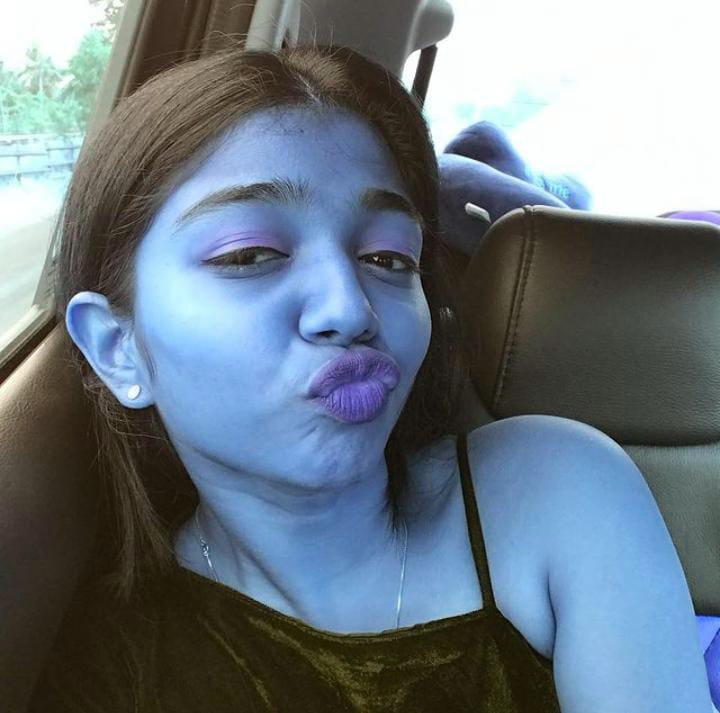

In [43]:
cv2.imread("/content/drive/MyDrive/IR_MODEL/basedata/train/amala/a1.jpeg")

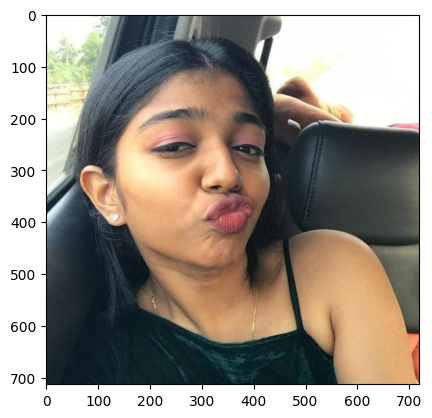

In [44]:
plt.imshow(img)

In [45]:
cv2.imread("/content/drive/MyDrive/IR_MODEL/basedata/train/amala/a1.jpeg").shape


(713, 720, 3)

In [46]:
train = ImageDataGenerator(rescale= 1/255)
validation=ImageDataGenerator(rescale=1/255)

In [47]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/IR_MODEL/basedata/train',
                                        target_size=(200,200),
                                        batch_size = 3,
                                        class_mode='binary')
validation_dataset=train.flow_from_directory('/content/drive/MyDrive/IR_MODEL/basedata/validation',
                                        target_size=(200,200),
                                        batch_size = 3,
                                        class_mode='binary')

Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [48]:
train_dataset.class_indices

{'amala': 0, 'priya': 1}

In [49]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [50]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
                                 metrics=['accuracy'])

In [52]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=5,
                    epochs=30,
                    validation_data=validation_dataset)

Epoch 1/30
5/5 [==============================] - 4s 190ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 1s 118ms/step - loss: 0.0000e+00 - accuracy: 0.4667 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 0s 112ms/step - loss: 0.0000e+00 - accuracy: 0.5333 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - accuracy: 0.4667 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 0s 90ms/step - loss: 0.0000e+00 - accuracy: 0.4667 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 0s 87ms/step - loss: 0.0000e+00 - accuracy: 0.6000 - val_loss: 0.

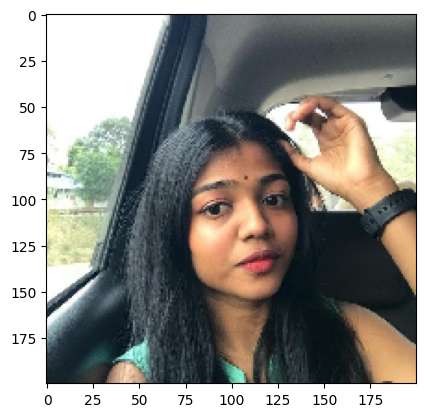

1/1 [==============================] - 0s 136ms/step
Amala


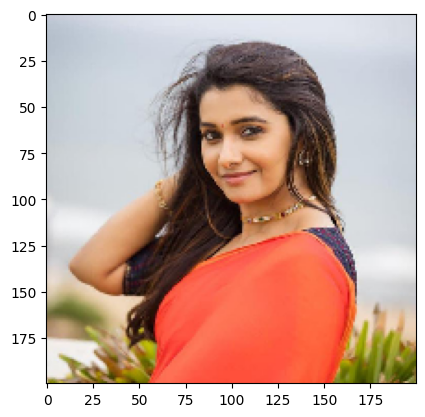

1/1 [==============================] - 0s 29ms/step
Amala


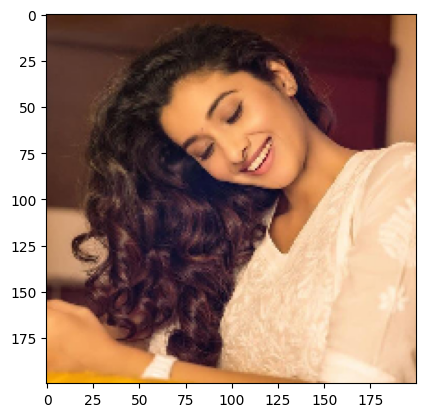

1/1 [==============================] - 0s 33ms/step
Amala


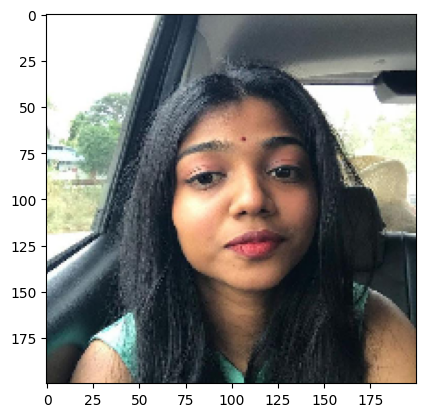

1/1 [==============================] - 0s 33ms/step
Amala


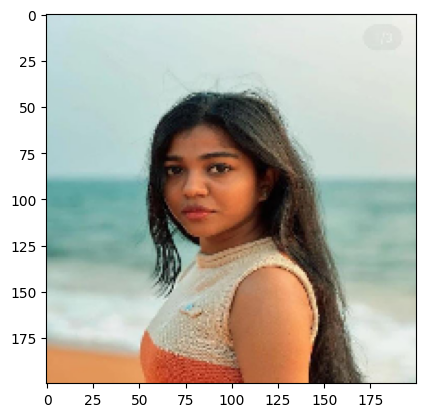

1/1 [==============================] - 0s 21ms/step
Amala


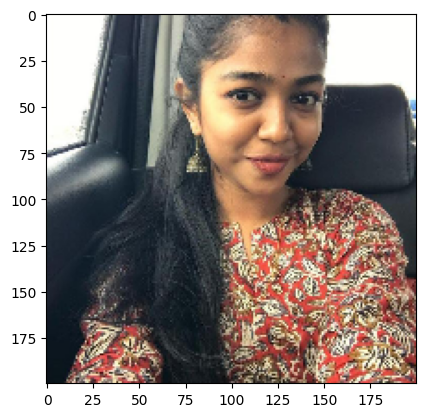

1/1 [==============================] - 0s 24ms/step
Amala


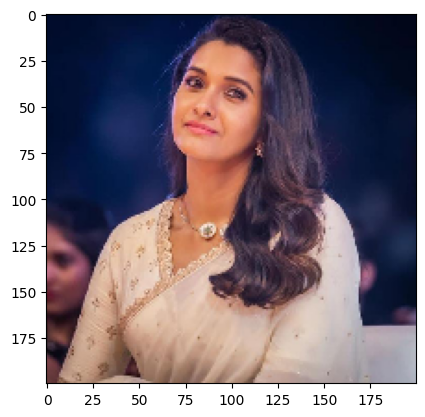

1/1 [==============================] - 0s 28ms/step
Amala


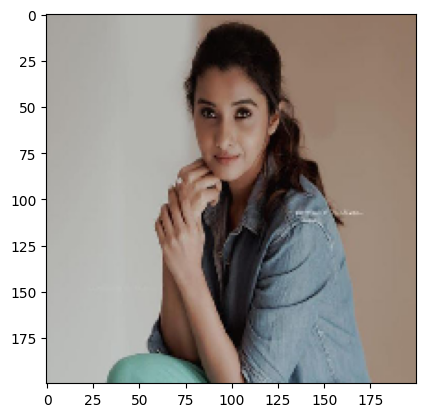

1/1 [==============================] - 0s 21ms/step
Amala


In [54]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = "/content/drive/MyDrive/IR_MODEL/basedata/test"
for root, dirs, files in os.walk(dir_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)

        # Check if it's an image file
        if file_path.endswith(('.png', '.jpg', '.jpeg')):
            img = image.load_img(file_path, target_size=(200, 200))
            plt.imshow(img)
            plt.show()

            X = image.img_to_array(img)
            X = np.expand_dims(X, axis=0)
            images = np.vstack([X])

            # Assuming you have defined `model` somewhere
            val = model.predict(images)

            if val == 0:
                print("Amala")
            else:
                print("Priya")
        else:
            print(f"Skipping non-image file: {file_name}")


In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define Data Generators with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/drive/MyDrive/IR_MODEL/basedata/train"
validation_dir = "/content/drive/MyDrive/IR_MODEL/basedata/validation"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

# Create Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,  # Increase epochs for more training
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[reduce_lr]
)

# Evaluate the Model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)


Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.7292 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 1s 539ms/step - loss: 0.7302 - accuracy: 0.5000 - val_loss: 0.7881 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 1s 559ms/step - loss: 0.7916 - accuracy: 0.5000 - val_loss: 0.6980 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 1s 636ms/step - loss: 0.7026 - accuracy: 0.5000 - val_loss: 0.6873 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 1s 539ms/step - loss: 0.6932 - accuracy: 0.4444 - val_loss: 0.6879 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/50
1/1 [==============================] - 1s 528ms/step - loss: 0.6873 - accuracy: 0.5000 - val_loss: 0.6863 - val_accuracy: 0.6667 - lr: 0.0010
Epoch

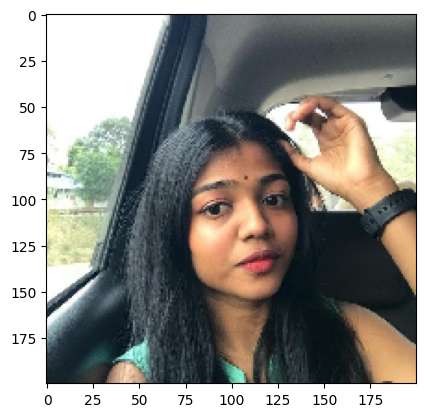

1/1 [==============================] - 0s 84ms/step
Amala


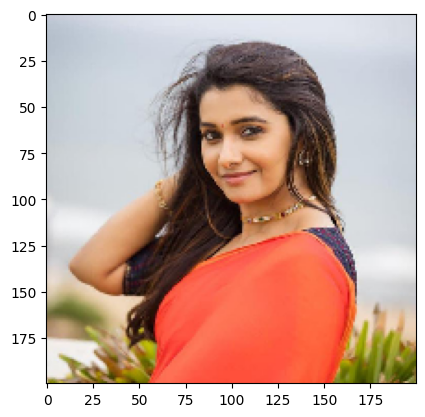

1/1 [==============================] - 0s 21ms/step
Priya


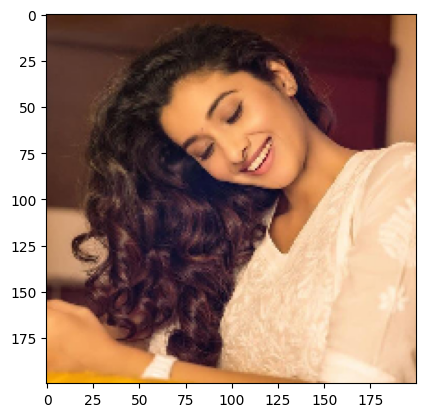

1/1 [==============================] - 0s 22ms/step
Priya


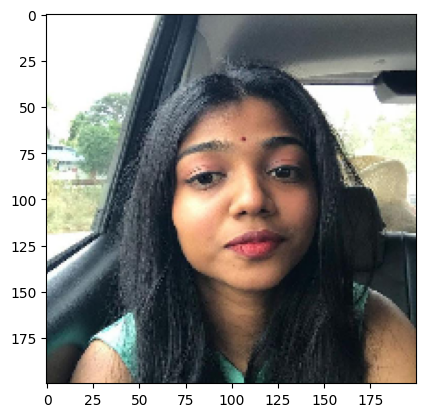

1/1 [==============================] - 0s 30ms/step
Amala


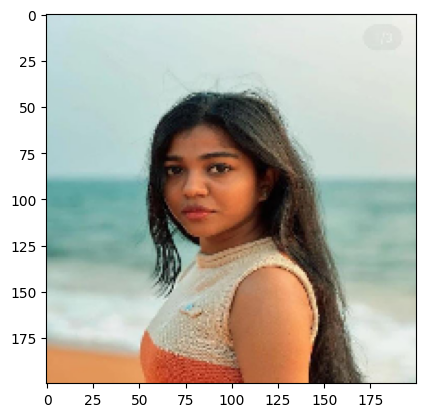

1/1 [==============================] - 0s 34ms/step
Priya


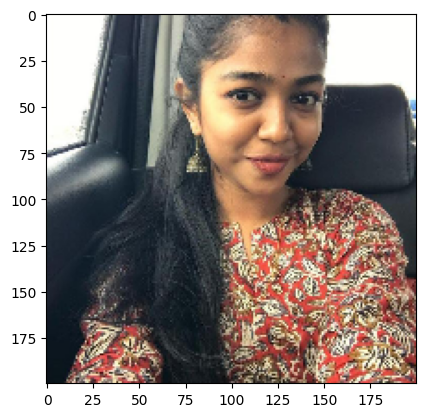

1/1 [==============================] - 0s 39ms/step
Priya


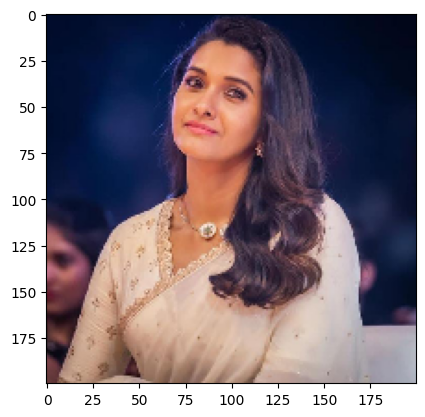

1/1 [==============================] - 0s 36ms/step
Priya


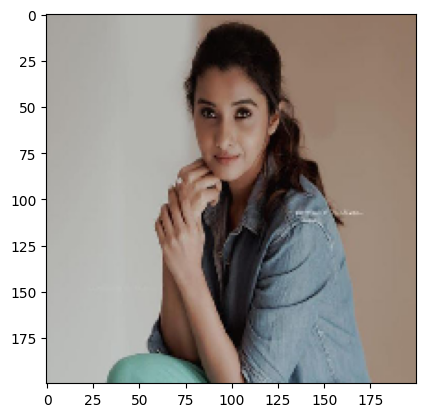

1/1 [==============================] - 0s 27ms/step
Priya


In [56]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = "/content/drive/MyDrive/IR_MODEL/basedata/test"
for root, dirs, files in os.walk(dir_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)

        # Check if it's an image file
        if file_path.endswith(('.png', '.jpg', '.jpeg')):
            img = image.load_img(file_path, target_size=(200, 200))
            plt.imshow(img)
            plt.show()

            X = image.img_to_array(img)
            X = np.expand_dims(X, axis=0)
            images = np.vstack([X])

            # Assuming you have defined `model` somewhere
            val = model.predict(images)

            if val == 0:
                print("Amala")
            else:
                print("Priya")
        else:
            print(f"Skipping non-image file: {file_name}")

In [57]:
model.export("IR_exported_model")

Saved artifact at 'IR_exported_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='conv2d_20_input')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139465332385472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465332383008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465332377904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465332375616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465332383888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465332383360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465332385120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465332376320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465330979264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139465332454704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1394653309

In [58]:
reloaded_artifact=tf.saved_model.load("IR_exported_model")